In [ ]:
from base import np, plt

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap3D/"

# Generalising Step Concentrations

Concentration profile described by a spherical layer with inner radii ($r_0$) and thicknesses ($\lambda$), with the restriction $r_0 + \lambda \leq L$.

$$
c_{\text{layer}}(r; r_0,\lambda) = 
\begin{cases} 
\frac{3}{4 \pi} \frac{1}{\lambda^3 + 3 \lambda^2 r_0 + 3 \lambda r_0^2} & \text{if } r_0 \leq r \leq r_0 + \lambda, \\
0 & \text{otherwise}.
\end{cases}
$$

In [3]:
def layer_generator(r0, l):
    'Define the inner step function that takes r as parameter'
    def c_layer(r):
        'Determine the condition based on r0 and l'
        cond = (r >= r0) & (r <= r0 + l)
        c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_layer

syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 1000,
    # Max Bacterial Boundary
    'L' : 3,
    'Tc': None,
    # Number of points
    'nr': 100_000, # Weird triangles appear if it's too low
    'n_r0': 250,'n_l': 250
}

### FluxMaps: $\quad l \in [0,10-1], \; n_r = 10^5, \; \& \; Tc \in [0.1, 100]$

ODEs solved:  76%|███████▌  | 23632/31126 [01:00<00:16, 463.88it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 31126/31126 [02:39<00:00, 194.60it/s]


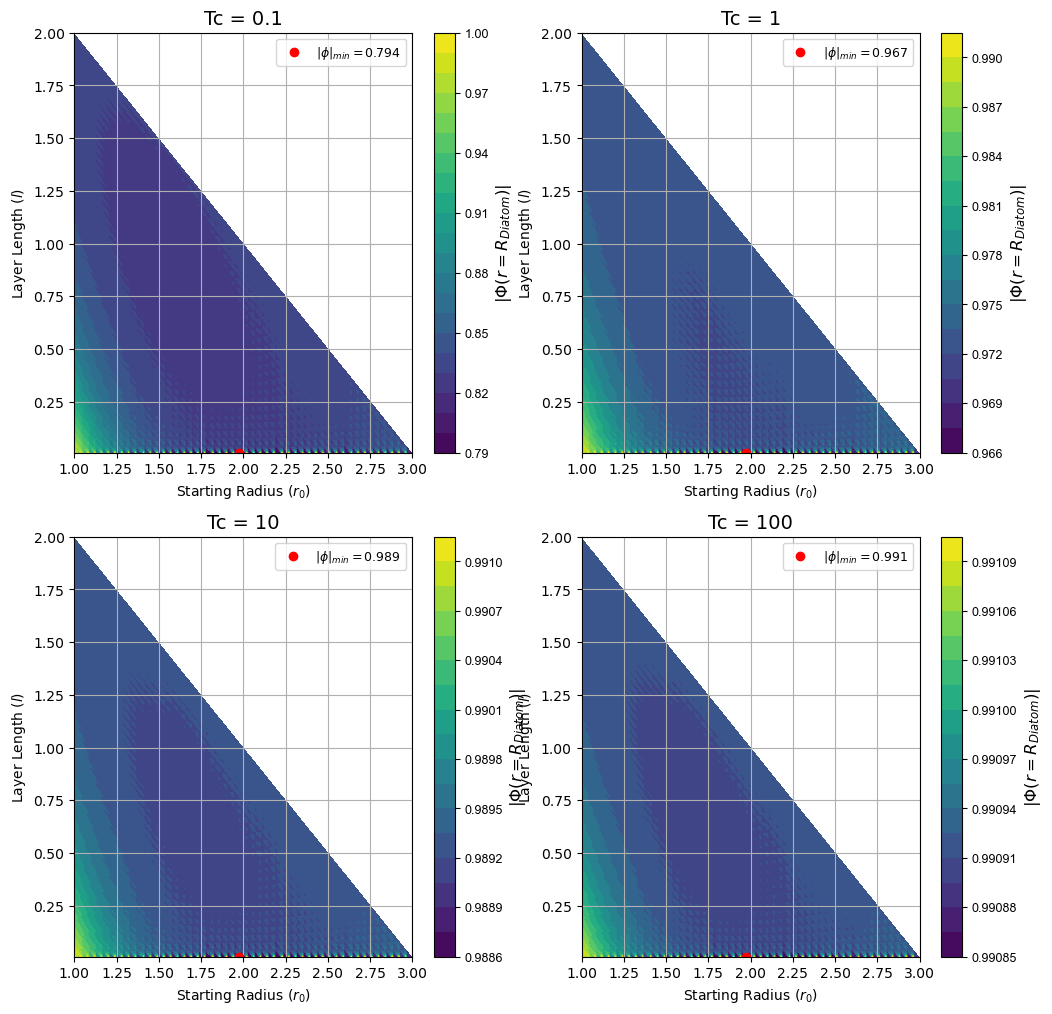

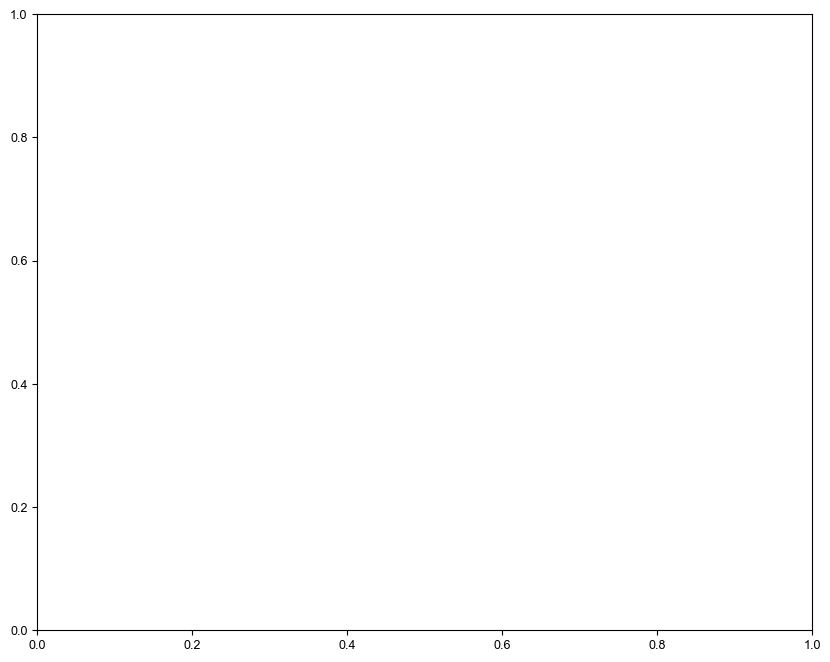

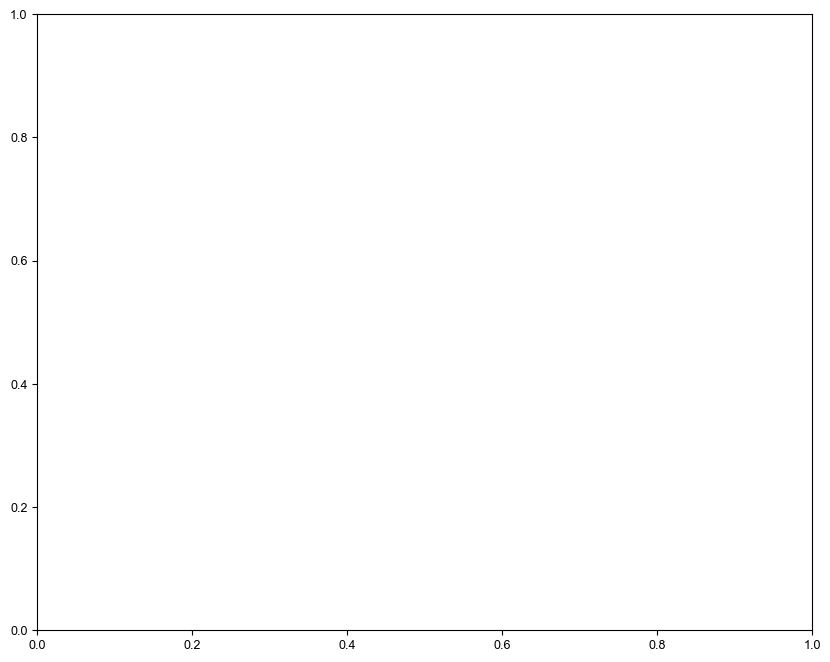

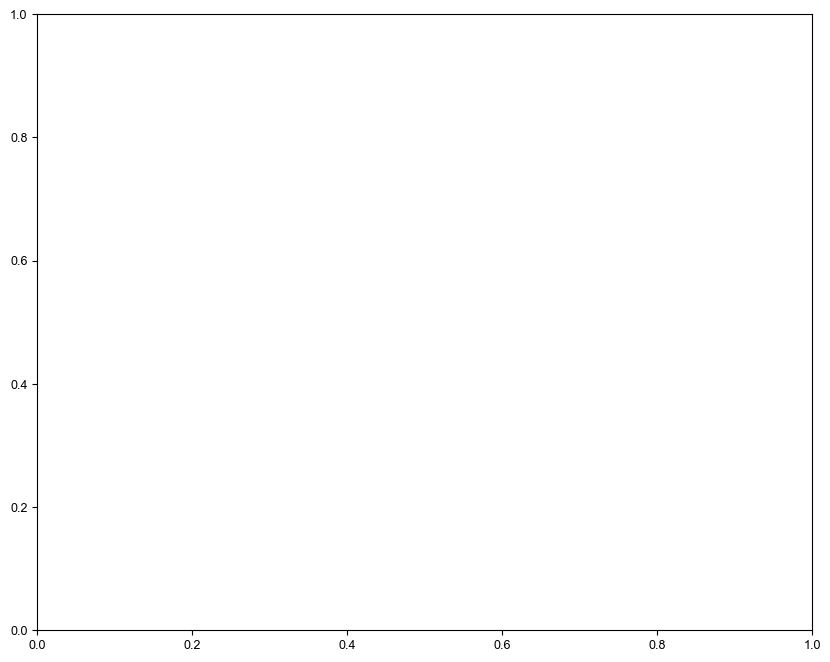

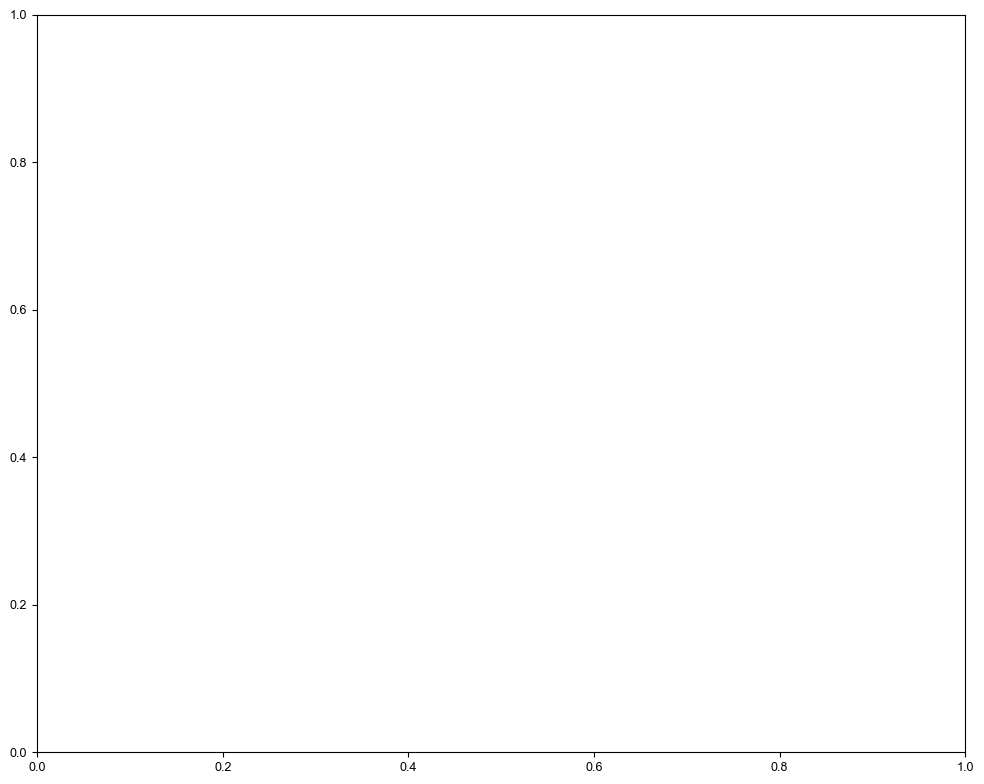

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

for i, Tc in enumerate([0.1, 1, 10, 100]):
    syst_params['Tc'] = Tc
    FM = FluxMap3D(syst_params, layer_generator)
    FM.solve(n_jobs=-1)
    row, col = divmod(i, 2)
    FM.plot(ax=axs[row, col], set_nans=True, set_min=True)
    FM.ax.set_title(f"Tc = {Tc}")

plt.tight_layout()

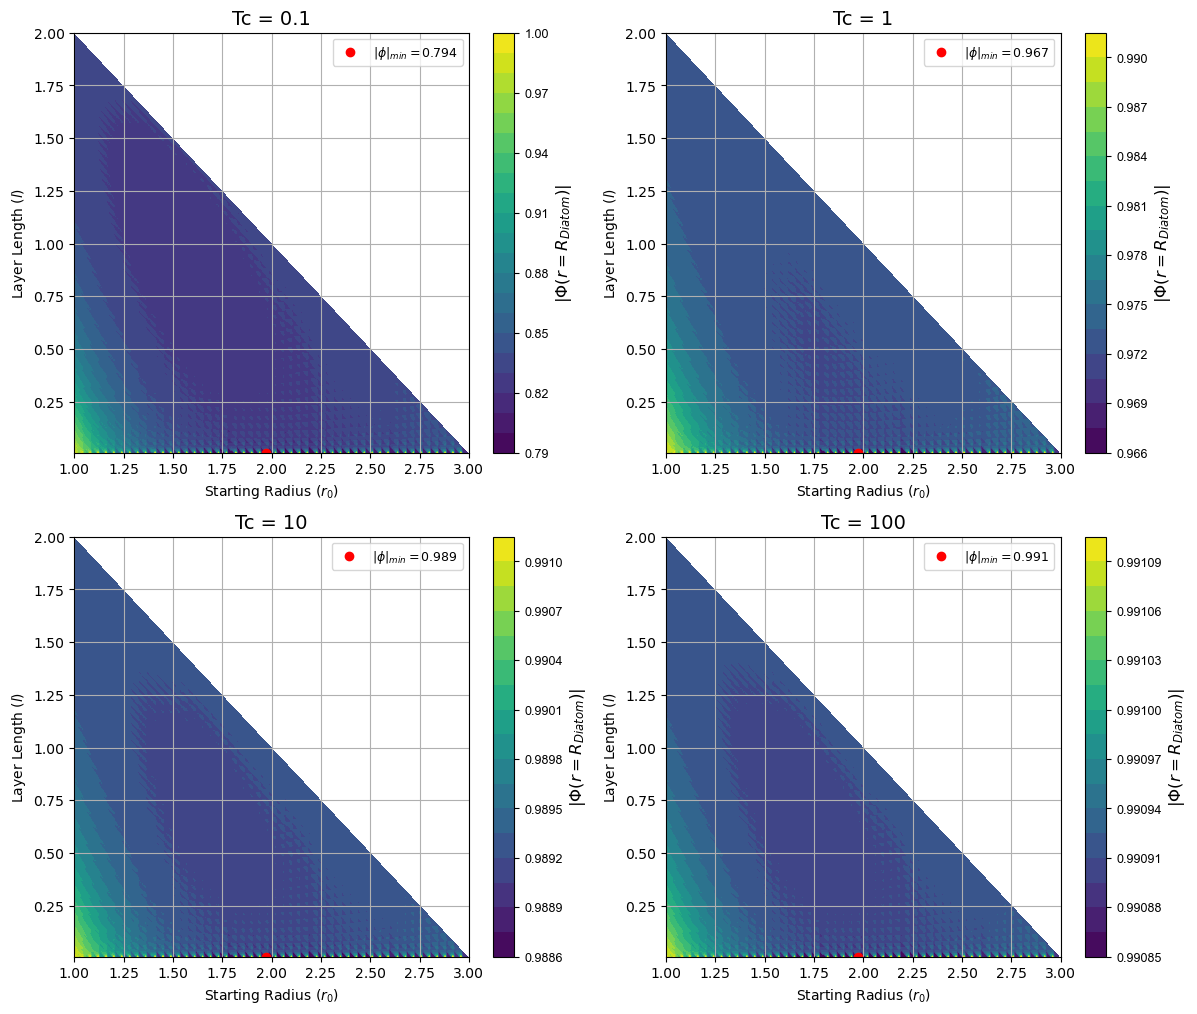

In [7]:
fig.set_size_inches(14, 12)
fig